In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings("ignore", message="X does not have valid feature names")
import pickle


In [38]:
df = pd.read_csv('Data/USA_Housing.csv')
print(df.head())

   Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0      79545.458574             5.682861                   7.009188   
1      79248.642455             6.002900                   6.730821   
2      61287.067179             5.865890                   8.512727   
3      63345.240046             7.188236                   5.586729   
4      59982.197226             5.040555                   7.839388   

   Avg. Area Number of Bedrooms  Area Population         Price  \
0                          4.09     23086.800503  1.059034e+06   
1                          3.09     40173.072174  1.505891e+06   
2                          5.13     36882.159400  1.058988e+06   
3                          3.26     34310.242831  1.260617e+06   
4                          4.23     26354.109472  6.309435e+05   

                                             Address  
0  208 Michael Ferry Apt. 674\nLaurabury, NE 3701...  
1  188 Johnson Views Suite 079\nLake Kathleen, CA...  
2  9127 Eli

In [39]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB
None


In [40]:
print(df.describe())

       Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
count       5000.000000          5000.000000                5000.000000   
mean       68583.108984             5.977222                   6.987792   
std        10657.991214             0.991456                   1.005833   
min        17796.631190             2.644304                   3.236194   
25%        61480.562388             5.322283                   6.299250   
50%        68804.286404             5.970429                   7.002902   
75%        75783.338666             6.650808                   7.665871   
max       107701.748378             9.519088                  10.759588   

       Avg. Area Number of Bedrooms  Area Population         Price  
count                   5000.000000      5000.000000  5.000000e+03  
mean                       3.981330     36163.516039  1.232073e+06  
std                        1.234137      9925.650114  3.531176e+05  
min                        2.000000       172.61

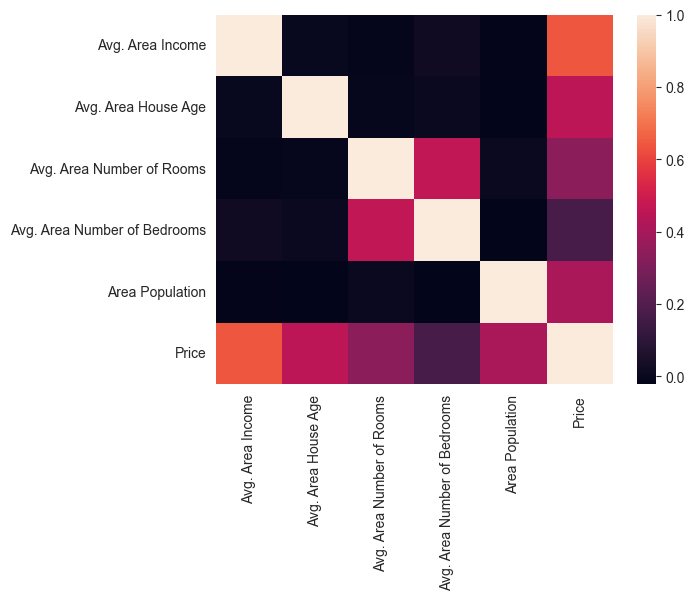

In [41]:
sns.heatmap(df.corr(numeric_only=True))
plt.show()

In [42]:
X = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
        'Avg. Area Number of Bedrooms', 'Area Population']]
y = df['Price']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
random_state=101)


In [44]:
lm = LinearRegression()
lm.fit(X_train,y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [45]:
predictions = lm.predict(X_test)

In [46]:
pre1 = lm.predict(X_test.iloc[[0]])
print("kết quả =", pre1)

kết quả = [1257919.72909702]


In [48]:
pre2 = lm.predict([[66774.995817, 5.717143, 7.795215, 4.320000, 36788.980327]])
print("kết quả 2 =", pre2)

kết quả 2 = [1257919.7174458]


In [49]:
# print the intercept
print(lm.intercept_)
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
print(coeff_df)

-2640441.399782747
                                Coefficient
Avg. Area Income                  21.566696
Avg. Area House Age           165453.042478
Avg. Area Number of Rooms     120499.839093
Avg. Area Number of Bedrooms    1999.785336
Area Population                   15.340604


In [50]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 81305.23300086714
MSE: 10100187858.869934
RMSE: 100499.6908396734


In [53]:
modelname="Data/housingmodel.zip"
pickle.dump(lm, open(modelname, 'wb'))


In [54]:
modelname="Data/housingmodel.zip"
trainedmodel=pickle.load(open(modelname, 'rb'))

In [55]:
from pandas import Index

features = Index(['Avg. Area Income', 'Avg. Area House Age',
                  'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms',
                  'Area Population'], dtype='object')
coeff_df = pd.DataFrame(trainedmodel.coef_, features, columns=['Coefficient'])
coeff_df

,Coefficient
Avg. Area Income,21.566696
Avg. Area House Age,165453.042478
Avg. Area Number of Rooms,120499.839093
Avg. Area Number of Bedrooms,1999.785336
Area Population,15.340604


In [56]:
prediction=trainedmodel.predict([[66774.995817,5.717143,7.795215,4.320000,36788.980327]])
print("kết quả =",prediction)


kết quả = [1257919.7174458]
